In [1]:

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:

!wget https://cainvas-static.s3.amazonaws.com/media/user_data/SiddharthGan/Kannada-MNIST.zip

!unzip -qo Kannada-MNIST.zip

# zip folder is not needed anymore
!rm Kannada-MNIST.zip

--2025-07-27 10:38:30--  https://cainvas-static.s3.amazonaws.com/media/user_data/SiddharthGan/Kannada-MNIST.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.66.116, 52.219.158.23, 16.12.40.99, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.66.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13014944 (12M) [application/zip]
Saving to: ‘Kannada-MNIST.zip’

Kannada-MNIST.zip   100%[===================>]  12.41M  2.23MB/s    in 12s     

2025-07-27 10:38:44 (1.03 MB/s) - ‘Kannada-MNIST.zip’ saved [13014944/13014944]



In [3]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv("test.csv")
dig_set = pd.read_csv("Dig-MNIST.csv")

train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

x_train=train_df.drop(["label"], axis=1).values.astype('float32')
y_train=train_df["label"].values.astype("int32")

x_test=test_df.drop(["id"],axis=1).values.astype('float32')

test_df.columns

Index(['id', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
x_train=x_train.reshape(x_train.shape[0], 28, 28)/255.0
x_test=x_test.reshape(x_test.shape[0], 28, 28)/255.0

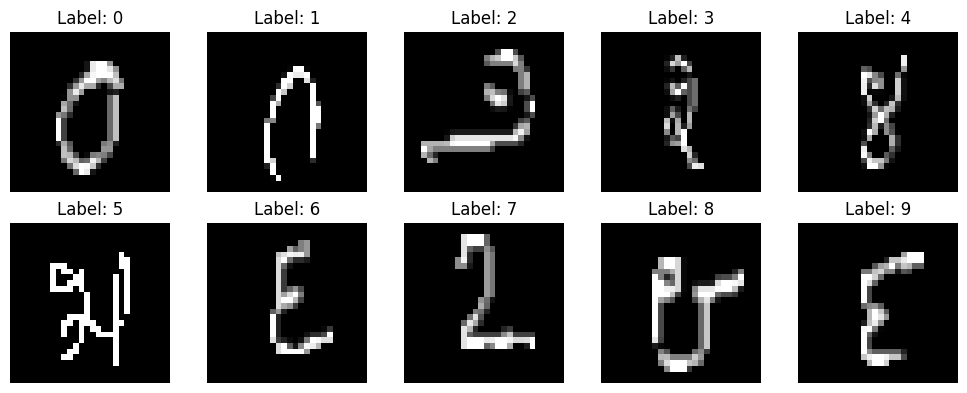

In [5]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train, y_train, test_size=0.2)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)

(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)
(5000, 28, 28)


In [8]:
x_train=x_train.reshape(x_train.shape[0], 28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_val=x_val.reshape(x_val.shape[0],28,28,1)

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dense, Activation, ReLU, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model

X=Input(shape=[28,28,1])
x=Conv2D(16, (3,3), strides=1, padding="same", name="conv1")(X)
x=BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform", name="batch1")(x)
x=Activation('relu',name='relu1')(x)
x=Dropout(0.1)(x)

x=Conv2D(32, (3,3), strides=1, padding="same", name="conv2")(x)
x=BatchNormalization(momentum=0.15, epsilon=1e-5, gamma_initializer="uniform", name="batch2")(x)
x=Activation('relu',name='relu2')(x)
x=Dropout(0.15)(x)
x=MaxPooling2D(pool_size=2, strides=2, padding="same", name="max2")(x)

x=Conv2D(64, (5,5), strides=1, padding ="same", name="conv3")(x)
x=BatchNormalization(momentum=0.17, epsilon=1e-5, gamma_initializer="uniform", name="batch3")(x)
x=Activation('relu', name="relu3")(x)
x=MaxPooling2D(pool_size=2, strides=2, padding="same", name="max3")(x)

x=Conv2D(64, (5,5), strides=1, padding="same", name="conv4")(x)
x=BatchNormalization(momentum=0.15, epsilon=1e-5, gamma_initializer="uniform", name="batch4")(x)
x=Activation('relu', name="relu4")(x)
x=Dropout(0.17)(x)

x=Conv2D(32, (3,3), strides=1, padding="same", name="conv5")(x)
x=BatchNormalization(momentum=0.15, epsilon=1e-5, gamma_initializer="uniform", name="batch5")(x)
x=Activation('relu', name='relu5')(x)
#x=MaxPooling2D(pool_size=2, strides=2, padding="same", name="max5")(x)
x=Dropout(0.2)(x)

x=Conv2D(16, (3,3), strides=1, padding="same", name="conv6")(x)
x=BatchNormalization(momentum=0.15, epsilon=1e-5, gamma_initializer="uniform", name="batch6" )(x)
x=Activation('relu', name="relu6")(x)
x=Dropout(0.05)(x)
#x=MaxPooling2D(pool_size=2, strides=2, padding="same", name="max6")(x)

x=Flatten()(x)
x=Dense(50, name="Dense1")(x)
x=Activation('relu', name='relu7')(x)
x=Dropout(0.05)(x)
x=Dense(25, name="Dense2")(x)
x=Activation('relu', name='relu8')(x)
x=Dropout(0.03)(x)
x=Dense(10, name="Dense3")(x)
x=Activation('softmax')(x)

model=Model(inputs=X, outputs=x)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch1 (BatchNormalization)     │ (None, 28, 28, 16)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch2 (BatchNormalization)     │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max2 (MaxPooling2D)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch3 (BatchNormalization)     │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (Activation)              │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max3 (MaxPooling2D)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 7, 7, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch4 (BatchNormalization)     │ (None, 7, 7, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu4 (Activation)              │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch5 (BatchNormalization)     │ (None, 7, 7, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu5 (Activation)              │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 7, 7, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch6 (BatchNormalization)     │ (None, 7, 7, 16)       │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu6 (Activation)              │ (None, 7, 7, 16)       │             

 Total params: 223,297 (872.25 KB)

 Trainable params: 222,849 (870.50 KB)

 Non-trainable params: 448 (1.75 KB)

None


In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

     layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_val, y_val))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8558 - loss: 0.4354 - val_accuracy: 0.9771 - val_loss: 0.0675
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9784 - loss: 0.0640 - val_accuracy: 0.9764 - val_loss: 0.0695
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9850 - loss: 0.0485 - val_accuracy: 0.9861 - val_loss: 0.0443
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9869 - loss: 0.0381 - val_accuracy: 0.9840 - val_loss: 0.0465
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9862 - val_loss: 0.0467


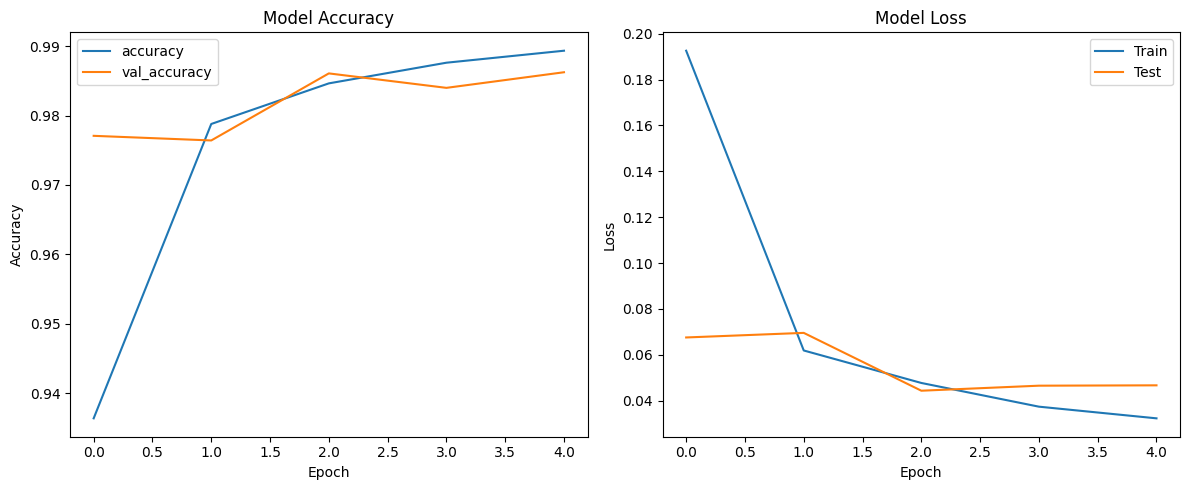

In [13]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
test_loss, test_acc = model.evaluate(x_val, y_val, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

375/375 - 5s - 13ms/step - accuracy: 0.9862 - loss: 0.0467

Test accuracy: 0.9862


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [21]:

clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(x_train,y_train)


print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(x_val,y_val)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(x_val)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_val, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_val,y_pred)

print('\nRFC Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



ValueError: Found array with dim 4. RandomForestClassifier expected <= 2.

375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step


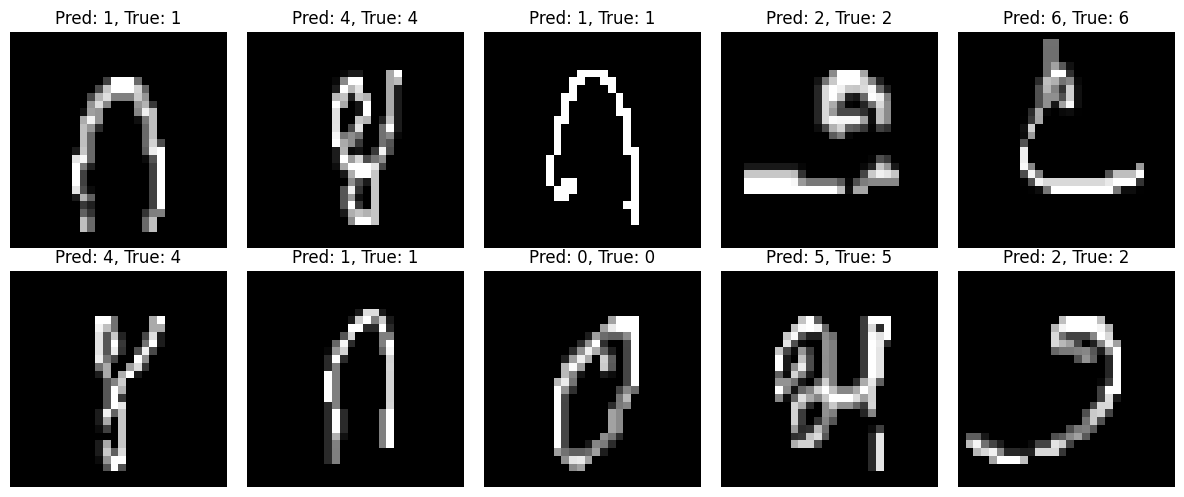

In [ ]:
predictions = model.predict(x_val)

# Show sample predictions
num_images = 10
plt.figure(figsize=(12, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_val[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}, True: {y_val[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Saving Capture.JPG to Capture.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Predicted digit: 8


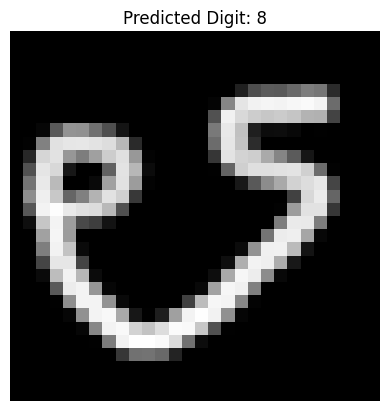

In [ ]:
from google.colab import files
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Upload
uploaded = files.upload()

for filename in uploaded.keys():
    # Load and preprocess image
    img = Image.open(filename).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((28, 28))

    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)

    # Predict
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)

    # Display
    print(f"Predicted digit: {predicted_digit}")
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis('off')
    plt.show()
